# Load data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

ccba = pd.read_csv("dataset/training_dataset_first/public_train_x_ccba_full_hashed.csv")
cdtx = pd.read_csv("dataset/training_dataset_first/public_train_x_cdtx0001_full_hashed.csv")
custinfo = pd.read_csv("dataset/training_dataset_first/public_train_x_custinfo_full_hashed.csv")
dp = pd.read_csv("dataset/training_dataset_first/public_train_x_dp_full_hashed.csv")
remit = pd.read_csv("dataset/training_dataset_first/public_train_x_remit1_full_hashed.csv")
y = pd.read_csv("dataset/training_dataset_first/train_y_answer.csv")
date = pd.read_csv("dataset/training_dataset_first/train_x_alert_date.csv")
x_test_date = pd.read_csv("dataset/training_dataset_first/public_x_alert_date.csv")

<AxesSubplot: >

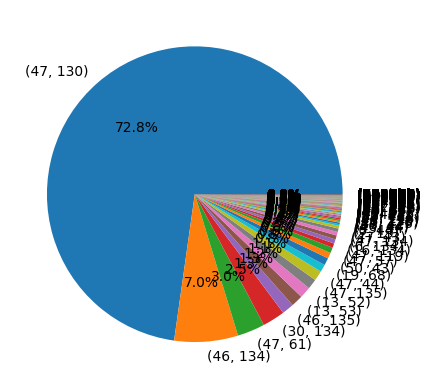

In [2]:
cdtx[['cur_type','country']].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [3]:
cdtx_1 = cdtx[(cdtx['country'] == 130) & (cdtx['cur_type'] == 47)].copy()

In [4]:
cdtx_2 = cdtx[(cdtx['country'] == 130) & (cdtx['cur_type'] != 47)].copy()

In [5]:
cdtx_3 = cdtx[(cdtx['country'] != 130) & (cdtx['cur_type'] == 47)].copy()

In [6]:
cdtx_4 = cdtx[(cdtx['country'] != 130) & (cdtx['cur_type'] != 47)].copy()

---

In [7]:
t_cdtx_1 = cdtx_1.groupby(['cust_id'], as_index=False).amt.mean()
t_cdtx_1.rename({'amt': 'avg_amt_tw_ntd'}, axis=1, inplace=True)
t_cdtx_1['sd_amt_tw_ntd'] = cdtx_1.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_1['total_amt_tw_ntd'] = cdtx_1.groupby(['cust_id'], as_index=False).amt.sum().amt

freq_1 = cdtx_1.groupby(['cust_id','date'], as_index=False).count()

t_cdtx_1['avg_freq_tw_ntd'] = freq_1.groupby(['cust_id'], as_index=False).amt.mean().amt
t_cdtx_1['sd_freq_tw_ntd'] = freq_1.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_1['total_freq_tw_ntd'] = freq_1.groupby(['cust_id'], as_index=False).amt.sum().amt

t_cdtx_1

,cust_id,avg_amt_tw_ntd,sd_amt_tw_ntd,total_amt_tw_ntd,avg_freq_tw_ntd,sd_freq_tw_ntd,total_freq_tw_ntd
0,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,1053.321429,4346.508457,88479.0,1.166667,0.444053,84
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,13190.844011,27895.057669,4735513.0,2.966942,4.393051,359
2,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,1985.859223,4189.989740,409087.0,1.401361,0.755436,206
3,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,13498.437500,41586.587827,215975.0,1.230769,0.599145,16
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381,2092.333333,360.172644,6277.0,1.000000,0.000000,3
...,...,...,...,...,...,...,...
3907,ffa5bcc6f88df5c33e809da4daa54de0031803f37d8f114b0ce2a70519099edc,502.500000,156.759901,2010.0,1.000000,0.000000,4
3908,ffae7fef923c78298cd647a3d573e48cc1404b07ac794a63f436399ceca4ed9d,1698.600000,3007.231394,59451.0,1.129032,0.340777,35
3909,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b9c8a23f77a194369c9,478.782609,2058.259582,66072.0,1.254545,0.565626,138
3910,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,3868.870707,16652.003251,1915091.0,1.860902,1.105481,495


In [8]:
t_cdtx_2 = cdtx_2.groupby(['cust_id'], as_index=False).amt.mean()
t_cdtx_2.rename({'amt': 'avg_amt_tw_nonntd'}, axis=1, inplace=True)
t_cdtx_2['sd_amt_tw_nonntd'] = cdtx_2.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_2['total_amt_tw_nonntd'] = cdtx_2.groupby(['cust_id'], as_index=False).amt.sum().amt

freq_2 = cdtx_2.groupby(['cust_id','date'], as_index=False).count()

t_cdtx_2['avg_freq_tw_nonntd'] = freq_2.groupby(['cust_id'], as_index=False).amt.mean().amt
t_cdtx_2['sd_freq_tw_nonntd'] = freq_2.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_2['total_freq_tw_nonntd'] = freq_2.groupby(['cust_id'], as_index=False).amt.sum().amt

t_cdtx_2

,cust_id,avg_amt_tw_nonntd,sd_amt_tw_nonntd,total_amt_tw_nonntd,avg_freq_tw_nonntd,sd_freq_tw_nonntd,total_freq_tw_nonntd
0,36a850557986c1684d7a09560cf31f5e994d0df3631009456f05b3535568788b,6539.0,NaN,6539.0,1.0,NaN,1


In [9]:
t_cdtx_3 = cdtx_3.groupby(['cust_id'], as_index=False).amt.mean()
t_cdtx_3.rename({'amt': 'avg_amt_nontw_ntd'}, axis=1, inplace=True)
t_cdtx_3['sd_amt_nontw_ntd'] = cdtx_3.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_3['total_amt_nontw_ntd'] = cdtx_3.groupby(['cust_id'], as_index=False).amt.sum().amt

freq_3 = cdtx_3.groupby(['cust_id','date'], as_index=False).count()

t_cdtx_3['avg_freq_nontw_ntd'] = freq_3.groupby(['cust_id'], as_index=False).amt.mean().amt
t_cdtx_3['sd_freq_nontw_ntd'] = freq_3.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_3['total_freq_nontw_ntd'] = freq_3.groupby(['cust_id'], as_index=False).amt.sum().amt

t_cdtx_3

,cust_id,avg_amt_nontw_ntd,sd_amt_nontw_ntd,total_amt_nontw_ntd,avg_freq_nontw_ntd,sd_freq_nontw_ntd,total_freq_nontw_ntd
0,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,1037.000000,1558.384099,3111.0,1.000000,0.000000,3
1,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,1705.587838,1943.942795,1009708.0,3.609756,3.277572,592
2,003be669534ad0a29cce9f22f56f625a545f918b04954702ae012c05dd5af2ad,456.142857,425.134265,3193.0,1.400000,0.547723,7
3,004fe2a935a6f8e2b171261efa6d53e2cc521709b61ae40ac55d027e7f5763f5,171.000000,0.000000,342.0,1.000000,0.000000,2
4,00eabc23fbb38516c8e9a13f3a8f8d00579ff7baeb2ec87a3763dfa82da1900c,2717.465116,6423.172838,116851.0,1.162162,0.373684,43
...,...,...,...,...,...,...,...
2025,ff7c5f61119b5df7bbbe77228e0078ca27e37046aedb342232491414648a7a7f,1215.500000,620.771831,4862.0,1.000000,0.000000,4
2026,ff824c1a876b074a3535308f9a95649ef26c14b91433b8842a1f1cbd9d956562,147.428571,244.253561,2064.0,1.166667,0.389249,14
2027,ffa2568d6d222e69c3cb2c43bc942720919a3dc2e252244a4c6ee241c6123553,7216.250000,11521.477915,57730.0,1.333333,0.516398,8
2028,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,865.727273,408.535617,19046.0,1.100000,0.307794,22


In [10]:
t_cdtx_4 = cdtx_4.groupby(['cust_id'], as_index=False).amt.mean()
t_cdtx_4.rename({'amt': 'avg_amt_nontw_nonntd'}, axis=1, inplace=True)
t_cdtx_4['sd_amt_nontw_nonntd'] = cdtx_4.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_4['total_amt_nontw_nonntd'] = cdtx_4.groupby(['cust_id'], as_index=False).amt.sum().amt

freq_4 = cdtx_4.groupby(['cust_id','date'], as_index=False).count()

t_cdtx_4['avg_freq_nontw_nonntd'] = freq_4.groupby(['cust_id'], as_index=False).amt.mean().amt
t_cdtx_4['sd_freq_nontw_nonntd'] = freq_4.groupby(['cust_id'], as_index=False).amt.std().amt
t_cdtx_4['total_freq_nontw_nonntd'] = freq_4.groupby(['cust_id'], as_index=False).amt.sum().amt

t_cdtx_4

,cust_id,avg_amt_nontw_nonntd,sd_amt_nontw_nonntd,total_amt_nontw_nonntd,avg_freq_nontw_nonntd,sd_freq_nontw_nonntd,total_freq_nontw_nonntd
0,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,8.000000,0.000000,48.0,1.000000,0.000000,6
1,00eabc23fbb38516c8e9a13f3a8f8d00579ff7baeb2ec87a3763dfa82da1900c,6302.842105,15494.959127,119754.0,1.000000,0.000000,19
2,018e8017163e4d9367597019afc6e878c7dfe90d42452ae5a6cae5b2795e0513,18450.701299,31198.617208,2841408.0,1.495146,1.235693,154
3,01e846811795df9dbe534fe129d595d6678e3c301e37337da645eade2b9e6789,9260.000000,NaN,9260.0,1.000000,NaN,1
4,021b24db10e3c8401e6d7ba959d9a86dc48f46541ba9bc905a10c756515dead1,6084.191489,10677.437049,285957.0,1.236842,0.430851,47
...,...,...,...,...,...,...,...
1154,fe69b536bfc0589e8198533243f08b2b9401bc352039f97472c39ca0f1536fa5,1190.000000,NaN,1190.0,1.000000,NaN,1
1155,fec476c1d12e20806dc384748798a07bfd972ed0626890c5b72b08c0379476df,770.000000,1075.369890,4620.0,1.500000,1.000000,6
1156,ff7c5f61119b5df7bbbe77228e0078ca27e37046aedb342232491414648a7a7f,1377.000000,NaN,1377.0,1.000000,NaN,1
1157,ffa2568d6d222e69c3cb2c43bc942720919a3dc2e252244a4c6ee241c6123553,2594.250000,2823.952948,10377.0,1.000000,0.000000,4


In [45]:
a = set(t_cdtx_1.cust_id.unique())
b = set(t_cdtx_2.cust_id.unique())
c = set(t_cdtx_3.cust_id.unique())
d = set(t_cdtx_4.cust_id.unique())
cdtx.cust_id.unique().shape

(3945,)

In [58]:
cdtx_agg = t_cdtx_1.merge(t_cdtx_2, how='left')
cdtx_agg

,cust_id,avg_amt_tw_ntd,sd_amt_tw_ntd,total_amt_tw_ntd,avg_freq_tw_ntd,sd_freq_tw_ntd,total_freq_tw_ntd,avg_amt_tw_nonntd,sd_amt_tw_nonntd,total_amt_tw_nonntd,avg_freq_tw_nonntd,sd_freq_tw_nonntd,total_freq_tw_nonntd
0,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,1053.321429,4346.508457,88479.0,1.166667,0.444053,84,NaN,NaN,NaN,NaN,NaN,NaN
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,13190.844011,27895.057669,4735513.0,2.966942,4.393051,359,NaN,NaN,NaN,NaN,NaN,NaN
2,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,1985.859223,4189.989740,409087.0,1.401361,0.755436,206,NaN,NaN,NaN,NaN,NaN,NaN
3,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,13498.437500,41586.587827,215975.0,1.230769,0.599145,16,NaN,NaN,NaN,NaN,NaN,NaN
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381,2092.333333,360.172644,6277.0,1.000000,0.000000,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,ffa5bcc6f88df5c33e809da4daa54de0031803f37d8f114b0ce2a70519099edc,502.500000,156.759901,2010.0,1.000000,0.000000,4,NaN,NaN,NaN,NaN,NaN,NaN
3908,ffae7fef923c78298cd647a3d573e48cc1404b07ac794a63f436399ceca4ed9d,1698.600000,3007.231394,59451.0,1.129032,0.340777,35,NaN,NaN,NaN,NaN,NaN,NaN
3909,ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b9c8a23f77a194369c9,478.782609,2058.259582,66072.0,1.254545,0.565626,138,NaN,NaN,NaN,NaN,NaN,NaN
3910,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,3868.870707,16652.003251,1915091.0,1.860902,1.105481,495,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
cdtx_agg = cdtx_agg.merge(t_cdtx_3, how='outer')

In [63]:
cdtx_agg = cdtx_agg.merge(t_cdtx_4, how='outer')

In [65]:
cdtx_agg.fillna(0)

,cust_id,avg_amt_tw_ntd,sd_amt_tw_ntd,total_amt_tw_ntd,avg_freq_tw_ntd,sd_freq_tw_ntd,total_freq_tw_ntd,avg_amt_tw_nonntd,sd_amt_tw_nonntd,total_amt_tw_nonntd,...,total_amt_nontw_ntd,avg_freq_nontw_ntd,sd_freq_nontw_ntd,total_freq_nontw_ntd,avg_amt_nontw_nonntd,sd_amt_nontw_nonntd,total_amt_nontw_nonntd,avg_freq_nontw_nonntd,sd_freq_nontw_nonntd,total_freq_nontw_nonntd
0,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,1053.321429,4346.508457,88479.0,1.166667,0.444053,84.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,13190.844011,27895.057669,4735513.0,2.966942,4.393051,359.0,0.0,0.0,0.0,...,3111.0,1.000000,0.000000,3.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,1985.859223,4189.989740,409087.0,1.401361,0.755436,206.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,13498.437500,41586.587827,215975.0,1.230769,0.599145,16.0,0.0,0.0,0.0,...,1009708.0,3.609756,3.277572,592.0,8.000000,0.000000,48.0,1.000000,0.000000,6.0
4,0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381,2092.333333,360.172644,6277.0,1.000000,0.000000,3.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,c6c7b5a7b41c02ee0c7217f85c5258aca9f2158f9f9d54a010877a3450140c11,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,8269.592375,15622.238138,2819931.0,1.982558,1.167162,341.0
3941,cc8036c05dedf001d7f35b5f9b743199eec586b5f3ef0c1abf1c2bc60ed6d3f1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,1728.000000,0.000000,1728.0,1.000000,0.000000,1.0
3942,db64d8d8c783640e7e79403f95f5759559ea8fca7725535bad1a7b84396cd342,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,2271.000000,6904.150807,619983.0,1.761290,1.179279,273.0
3943,df11307f6e8372f1ab198c8de7d1dadddc4fa244565bfdcce428e49437e8c1da,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,53770.826087,53259.390000,2473458.0,2.190476,1.806074,46.0


In [75]:
cdtx_agg.to_pickle('dataset/training_dataset_first/cdtx_agg.pkl')